# Assignment 1 - Used Cars Price Prediction and Evaluation(Car_price.csv)

# Step 1 : Importing Libraries and Understanding Data

In [70]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import sklearn #This lib contains all the models
import statsmodels.api as sm #will help to display data in the form of statistics

%matplotlib inline
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression

In [37]:
#Importing Car_price.csv data
car_price = pd.read_csv('Downloads/cars_price.csv')

In [38]:
#Look at first five rows
car_price.head(5)

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [39]:
# Looking at the last five rows
car_price.tail()

,Unnamed: 0,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
39995,39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN
39999,39999,mercedes-benz,190-w201,744,1986,with mileage,272344.0,diesel,1997.0,silver,mechanics,rear drive,D


# Lets check the Data type & Summary of the Data

In [40]:
print(car_price.shape)
print(car_price.describe())

(40000, 13)
        Unnamed: 0       priceUSD          year  mileage(kilometers)  \
count  40000.00000   40000.000000  40000.000000         4.000000e+04   
mean   19999.50000    7430.383775   2003.485625         2.434332e+05   
std    11547.14972    8338.242134      8.114896         3.167033e+05   
min        0.00000      95.000000   1938.000000         0.000000e+00   
25%     9999.75000    2350.000000   1998.000000         1.370000e+05   
50%    19999.50000    5350.000000   2004.000000         2.280000e+05   
75%    29999.25000    9850.000000   2010.000000         3.087610e+05   
max    39999.00000  195000.000000   2019.000000         9.999999e+06   

        volume(cm3)  
count  39970.000000  
mean    2103.201676  
std      938.724653  
min      500.000000  
25%     1600.000000  
50%     1995.000000  
75%     2300.000000  
max    20000.000000  


In [41]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


# Step 2: Visualising Data

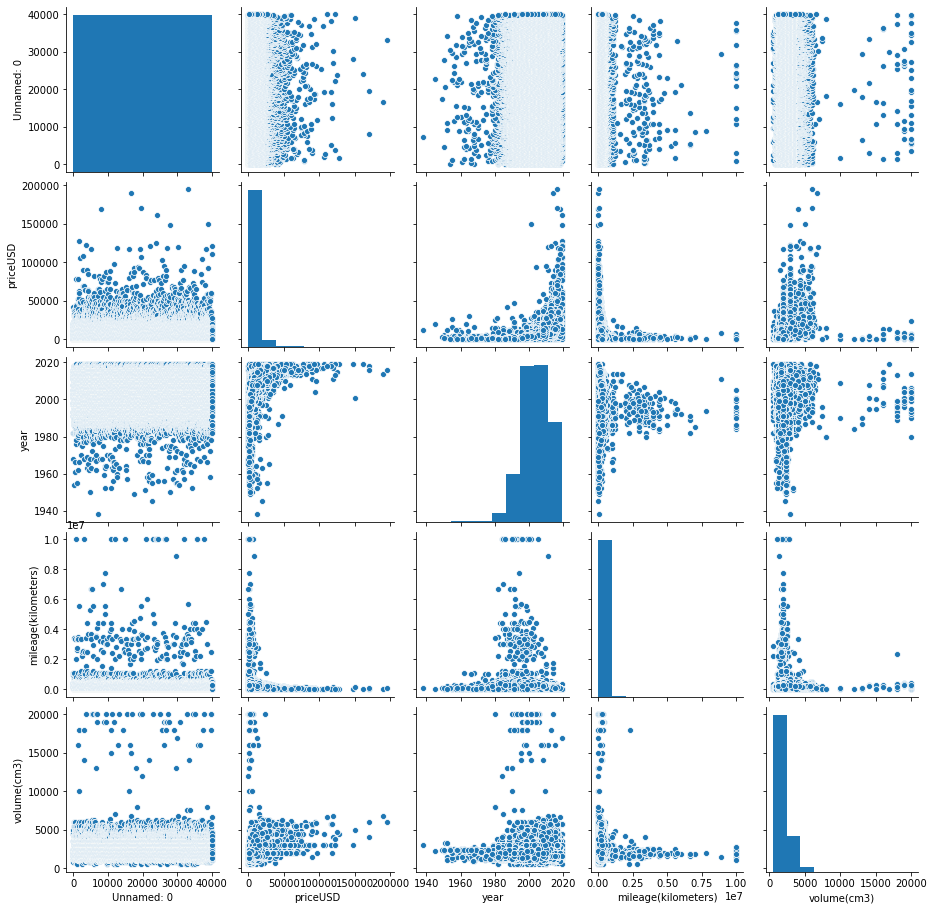

In [42]:
# Let's plot a pair plot of all numerical variables in our dataframe
sns.pairplot(car_price)

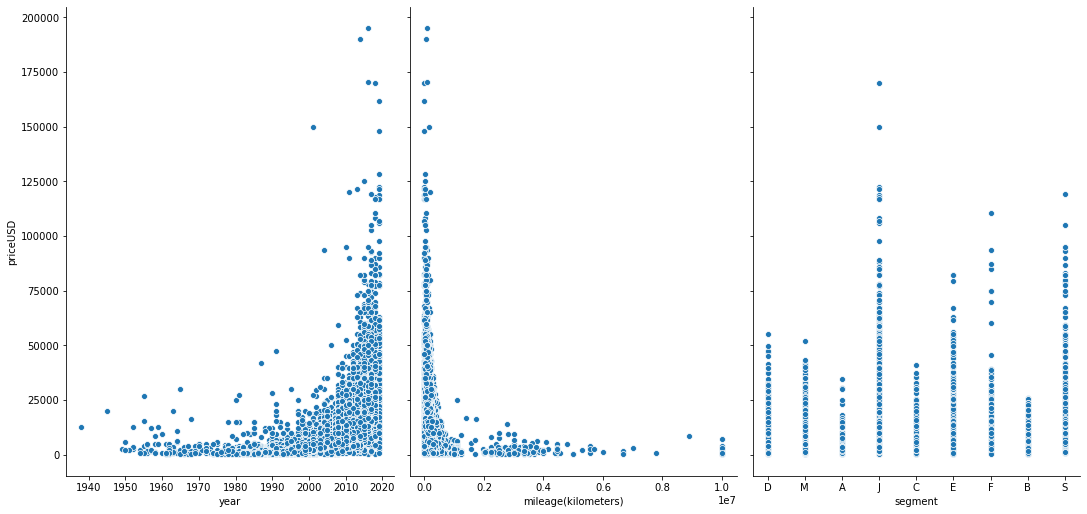

In [44]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(car_price, x_vars=['year','mileage(kilometers)','segment'], y_vars='priceUSD',
             size=7, aspect=0.7, kind='scatter')

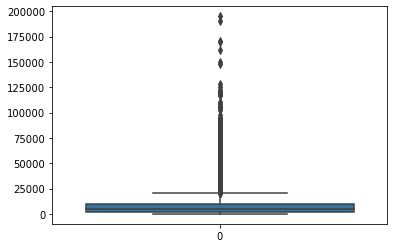

In [45]:
sns.boxplot(data=car_price["priceUSD"])

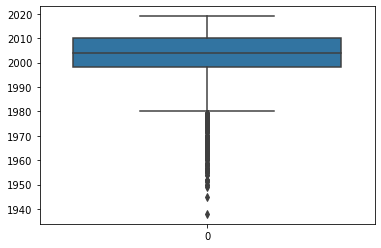

In [48]:
sns.boxplot(data=car_price["year"])

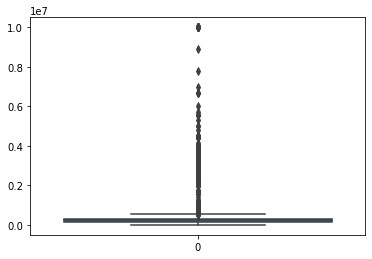

In [49]:
sns.boxplot(data=car_price["mileage(kilometers)"])

In [50]:
#for value in colname:
q1 = car_price['priceUSD'].quantile(0.25) #first quartile value
q3 = car_price['priceUSD'].quantile(0.75) #third quartile value
iqr = q3-q1 #interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print(low)
print(high)
print(q1)
print(q3)
print(iqr)

-8900.0
21100.0
2350.0
9850.0
7500.0


In [51]:
car_price.loc[car_price.priceUSD > 21100.0,'priceUSD'] = 21100.0
print(car_price.priceUSD)

0          565.0
1         5550.0
2         8300.0
3         3300.0
4         2450.0
          ...   
39995    12500.0
39996     4754.0
39997     4000.0
39998     1200.0
39999      744.0
Name: priceUSD, Length: 40000, dtype: float64


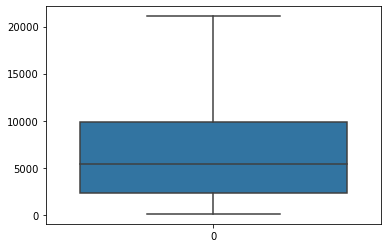

In [52]:
sns.boxplot(data=car_price["priceUSD"])

In [53]:
q1 = car_price['year'].quantile(0.25) #first quartile value
q3 = car_price['year'].quantile(0.75) #third quartile value
iqr = q3-q1 #interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print(low)
print(high)
print(q1)
print(q3)
print(iqr)

1980.0
2028.0
1998.0
2010.0
12.0


In [54]:
car_price.loc[car_price.year < 1980,'year'] = 1980
print(car_price.year)

0        1993
1        2008
2        2008
3        2005
4        2002
         ... 
39995    2008
39996    2001
39997    1999
39998    1996
39999    1986
Name: year, Length: 40000, dtype: int64


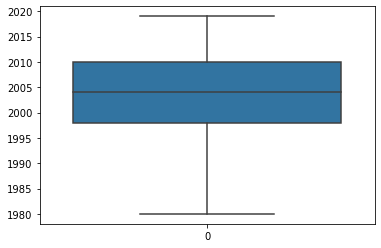

In [55]:
sns.boxplot(data=car_price["year"])

In [56]:
q1 = car_price['mileage(kilometers)'].quantile(0.25) #first quartile value
q3 = car_price['mileage(kilometers)'].quantile(0.75) #third quartile value
iqr = q3-q1 #interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print(low)
print(high)
print(q1)
print(q3)
print(iqr)

-120641.5
566402.5
137000.0
308761.0
171761.0


In [66]:
car_price.loc[car_price.mileage(kilometers) > 566402,'mileage(kilometers)'] = 566402
print(car_price.mileage(kilometers))

AttributeError: 'DataFrame' object has no attribute 'mileage'

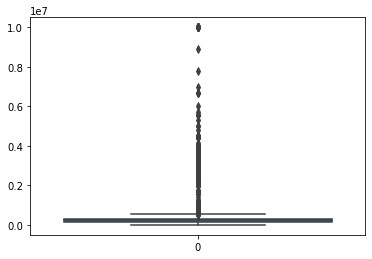

In [58]:
sns.boxplot(data=car_price["mileage(kilometers)"])

# Seperate the Numerical and Categorical variables

In [63]:
car_price_num = car_price[['mileage(kilometers)','year','priceUSD']]

Categorical Variables: The variables which are having category should be converted to dummy variables.

The Linear regression will only accept numbers so we will make dummy variables.

In [64]:
car_price_dummies = pd.get_dummies(car_price[['segment']])
car_price_dummies.head()

,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


# Combine Numerical and Dummy variables

In [ ]:
Combine Numerical and Dummy variables

In [65]:
car_price_combined = pd.concat([car_price_num, car_price_dummies], axis=1)
car_price_combined.head()

,mileage(kilometers),year,priceUSD,segment_A,segment_B,segment_C,segment_D,segment_E,segment_F,segment_J,segment_M,segment_S
0,960015.0,1993,565.0,0,0,0,1,0,0,0,0,0
1,172000.0,2008,5550.0,0,0,0,0,0,0,0,1,0
2,223000.0,2008,8300.0,0,0,0,1,0,0,0,0,0
3,140000.0,2005,3300.0,1,0,0,0,0,0,0,0,0
4,413000.0,2002,2450.0,0,0,0,1,0,0,0,0,0


# Step 3 : Splitting the data in Training and Test set

Using sklearn we split 70% of our data into training set and rest in test set.

Setting random_state will give the same training and test set everytime on running the code.

In [68]:
# Putting feature variable to X
X = car_price_combined[['mileage(kilometers)','year','segment_A','segment_B','segment_C','segment_D','segment_E','segment_F','segment_J','segment_M','segment_S']]

# Putting response variable to y
y = car_price['priceUSD']

In [69]:
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

# Step 4 : Performing Linear Regression

In [71]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [72]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Step 5 : Model Evaluation

In [73]:
# print the intercept
print(lm.intercept_)

-1005134.8064970984


In [74]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
mileage(kilometers),-0.000389
year,505.228145
segment_A,-3342.550824
segment_B,-3166.267053
segment_C,-1956.985883
segment_D,-679.626097
segment_E,937.463298
segment_F,2554.992233
segment_J,2917.182472
segment_M,-312.223724


# Step 6 : Predictions

In [75]:
# Making predictions using the model
y_pred = lm.predict(X_test)

# Step 7: Model Performance Metrics

Coefficient of Determination (R square)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [80]:
from math import sqrt
rmse = sqrt(mse)

In [81]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8834563.268460449
Root_Mean_Squared_Error : 2972.2993234969535
r_square_value : 0.7146341450234448


If the value of R2 is 0.7146 then this suggests that 71.4% of the variation in Y can be explained with the help of given explanatory variables in that model. In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.

On addition of a new variable the error is sure to decrease, thus R square always increases whenever a new variable is added to our model. This may not describe the importance of a variable

# Adjusted R square:

Adjusted R square will always be less than or equal to R square.
Thus as a general thumb rule if adjusted R square increases when a new variable is added to the model, the variable should remain in the model.

If the adjusted R square decreases when the new variable is added then the variable should not remain in the mode

# Multicollinearity
If independent valriables Xi’s are highly correlated then |X’X| will be close to 0 and hence inverse of (X’X) will not exist or will be indefinitely large. Mathematically, which will be indefinitely large in presence of multicollinearity. Long story in short, multicollinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.

How can you detect multicollinearity!!

Correlation Method:
By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.

VIF (Variance Inflation Factor) Method:
Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables


# Checking for P-value Using STATSMODELS

In [82]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const                 -1.005135e+06
mileage(kilometers)   -3.886964e-04
year                   5.052281e+02
segment_A             -3.342551e+03
segment_B             -3.166267e+03
segment_C             -1.956986e+03
segment_D             -6.796261e+02
segment_E              9.374633e+02
segment_F              2.554992e+03
segment_J              2.917182e+03
segment_M             -3.122237e+02
segment_S              4.912479e+03
dtype: float64

In [83]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     6078.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:10:38   Log-Likelihood:            -2.6425e+05
No. Observations:               28000   AIC:                         5.285e+05
Df Residuals:                   27988   BIC:                         5.286e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.005e+06   4

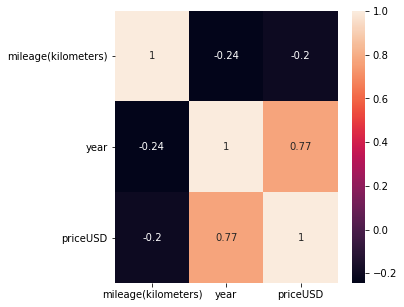

In [85]:
plt.figure(figsize = (5,5))
sns.heatmap(car_price_num.corr(),annot = True)

# Step 8 : Implementing the results

Text(0, 0.5, 'priceUSD')

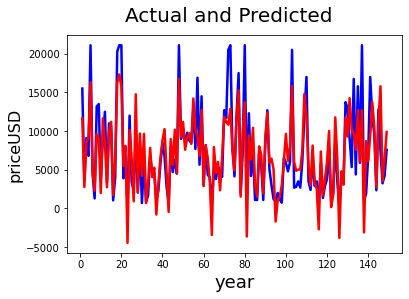

In [86]:
# Check for the forst 150 observations

c = [i for i in range(1,150,1)]
fig = plt.figure()
plt.plot(c,y_test[1:150], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred[1:150], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('year', fontsize=18)                               # X-label
plt.ylabel('priceUSD', fontsize=16)                               # Y-label

In [89]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8834563.268460449
r_square_value : 0.7146341450234448


In [90]:
X_train_final = X_train

#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X_train_final = sm.add_constant(X_train_final)

# create a fitted model in one line
lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:               priceUSD   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     6078.
Date:                Sat, 14 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:15:48   Log-Likelihood:            -2.6425e+05
No. Observations:               28000   AIC:                         5.285e+05
Df Residuals:                   27988   BIC:                         5.286e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.005e+06   4

# Variance Inflation Factor
Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2 ) .

Here, we take that particular X as response variable and all other explanatory

variables as independent variables. So, we run a regression between one of

those explanatory variables with remaining explanatory variables.

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [93]:
vif.round(2)

,VIF Factor,features
0,1.62,mileage(kilometers)
1,11.09,year
2,1.09,segment_A
3,1.83,segment_B
4,3.00,segment_C
5,3.40,segment_D
6,2.17,segment_E
7,1.18,segment_F
8,2.65,segment_J
9,2.21,segment_M
